## Imports and Data Collection

In [1]:


import pandas as pd
import numpy as np
from finta import TA
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

In [2]:
import yfinance as yf
# Define some variables
num_days = 365
interval = '1d'
ticker_1 = 'AAPL'
ticker_2 = 'TSLA'
ticker_3 = 'BTC-USD'
ticker_4 = '^GSPC'

# List of symbols for technical indicators
INDICATORS = ['RSI', 'MACD', 'STOCH','ADL', 'ATR', 'MOM', 'MFI', 'ROC', 'OBV', 'CCI', 'EMV', 'VORTEX']


In [3]:
import datetime
# Define start and end date 
start = (datetime.date.today() - datetime.timedelta(num_days))
end = datetime.datetime.today()

In [4]:
#Loading data into notebook

appl_df = yf.download(ticker_1, start=start, end=end)
display(appl_df.head())

tsla_df = yf.download(ticker_2, start=start, end=end)
display(tsla_df.head())

btc_df = yf.download(ticker_3, start=start, end=end)
display(btc_df.head())

sP_500_df = yf.download(ticker_4, start=start, end=end)
display(sP_500_df.head())

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-09,161.479996,163.410004,159.410004,162.949997,161.968826,91454900
2022-03-10,160.199997,160.389999,155.979996,158.520004,157.565506,105342000
2022-03-11,158.929993,159.279999,154.500000,154.729996,153.798325,96970100
2022-03-14,151.449997,154.119995,150.100006,150.619995,149.713058,108732100
2022-03-15,150.899994,155.570007,150.380005,155.089996,154.156158,92964300


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-09,279.826660,286.853333,277.336670,286.323334,286.323334,59184000
2022-03-10,283.816681,284.816681,270.119995,279.433319,279.433319,58648500
2022-03-11,280.066681,281.266663,264.589996,265.116669,265.116669,67037100
2022-03-14,260.203339,266.899994,252.013336,255.456665,255.456665,71152200
2022-03-15,258.423340,268.523346,252.190002,267.296661,267.296661,66841200


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-09,38742.816406,42465.671875,38706.093750,41982.925781,41982.925781,32284121034
2022-03-10,41974.070312,42004.726562,38832.941406,39437.460938,39437.460938,31078064711
2022-03-11,39439.968750,40081.679688,38347.433594,38794.972656,38794.972656,26364890465
2022-03-12,38794.464844,39308.597656,38772.535156,38904.011719,38904.011719,14616450657
2022-03-13,38884.726562,39209.351562,37728.144531,37849.664062,37849.664062,17300745310


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-09,4223.100098,4299.399902,4223.100098,4277.879883,4277.879883,5662670000
2022-03-10,4252.549805,4268.279785,4209.799805,4259.520020,4259.520020,4980830000
2022-03-11,4279.500000,4291.009766,4200.490234,4204.310059,4204.310059,4938640000
2022-03-14,4202.750000,4247.569824,4161.720215,4173.109863,4173.109863,5574920000
2022-03-15,4188.819824,4271.049805,4187.899902,4262.450195,4262.450195,5392470000


In [5]:
appl_df.rename(columns={"Close": 'close', "High": 'high', "Low": 'low', 'Volume': 'volume', 'Open': 'open'}, inplace=True)
appl_df.head()

,open,high,low,close,Adj Close,volume
Date,,,,,,
2022-03-09,161.479996,163.410004,159.410004,162.949997,161.968826,91454900
2022-03-10,160.199997,160.389999,155.979996,158.520004,157.565506,105342000
2022-03-11,158.929993,159.279999,154.500000,154.729996,153.798325,96970100
2022-03-14,151.449997,154.119995,150.100006,150.619995,149.713058,108732100
2022-03-15,150.899994,155.570007,150.380005,155.089996,154.156158,92964300


<AxesSubplot:xlabel='Date'>

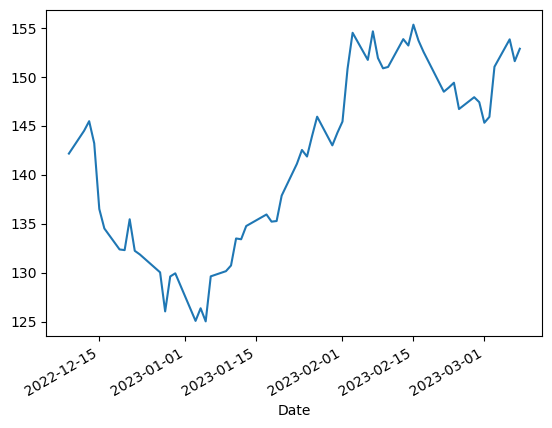

In [6]:
## slicing the data to last 60 day

appl_df_recent = appl_df.iloc[-60:]
appl_df_recent['close'].plot()

# Data Processing and Feature Engieering

<AxesSubplot:xlabel='Date'>

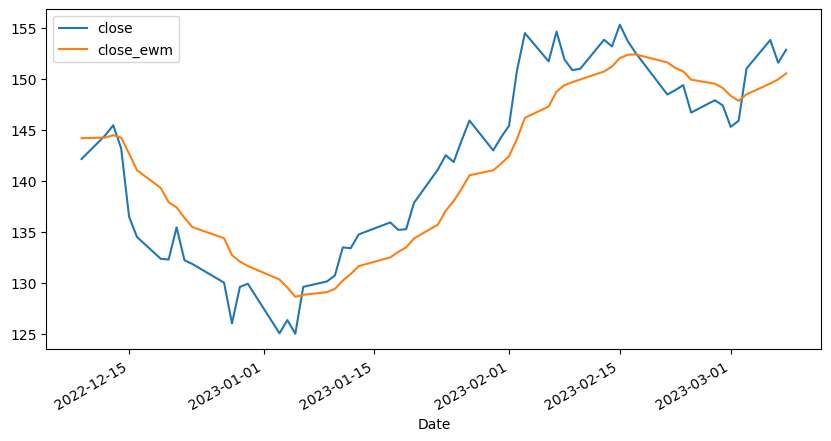

In [7]:

# Exponentially smooth the closing price data
appl_df['close_ewm'] = appl_df['close'].ewm(alpha=0.2).mean()

appl_df_recent = appl_df.iloc[-60:]

# Plot the original and smoothed closing price data
appl_df_recent[['close', 'close_ewm']].plot(figsize=(10, 5))

In [8]:
import talib as ta
# Compute the SMA Slow indicator for a 20-day period
appl_df['SMA_20'] = ta.SMA(appl_df['close'], timeperiod=20)

# Compute the SMA Long indicator for a 20-day period

appl_df['SMA_100'] = ta.SMA(appl_df['close'], timeperiod=100)

# Compute the RSI indicator for a 14-day period
appl_df['RSI_14'] = ta.RSI(appl_df['close'], timeperiod=14)

# Compute the moving averages 
appl_df['ema50'] = appl_df['close']/ appl_df['close'].ewm(50).mean()

# Compute the Bollinger Bands for a 20-day period
appl_df['upper_band'], appl_df['middle_band'], appl_df['lower_band'] = ta.BBANDS(appl_df['close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

# Use the pct_change function to generate returns from close prices
appl_df["Actual Returns"] = appl_df["close"].pct_change()

#Review DataFrame

appl_df.head()


,open,high,low,close,Adj Close,volume,close_ewm,SMA_20,SMA_100,RSI_14,ema50,upper_band,middle_band,lower_band,Actual Returns
Date,,,,,,,,,,,,,,,
2022-03-09,161.479996,163.410004,159.410004,162.949997,161.968826,91454900,162.949997,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
2022-03-10,160.199997,160.389999,155.979996,158.520004,157.565506,105342000,160.488890,NaN,NaN,NaN,0.986354,NaN,NaN,NaN,-0.027186
2022-03-11,158.929993,159.279999,154.500000,154.729996,153.798325,96970100,158.128687,NaN,NaN,NaN,0.975113,NaN,NaN,NaN,-0.023909
2022-03-14,151.449997,154.119995,150.100006,150.619995,149.713058,108732100,155.585092,NaN,NaN,NaN,0.961788,NaN,NaN,NaN,-0.026562
2022-03-15,150.899994,155.570007,150.380005,155.089996,154.156158,92964300,155.437813,NaN,NaN,NaN,0.992327,NaN,NaN,NaN,0.029677


In [9]:
# Dropping the the columns that are not required as features
appl_df.drop(['open','high','low','Adj Close'], axis = 1, inplace = True)

#Review Dataframe
appl_df.head()

,close,volume,close_ewm,SMA_20,SMA_100,RSI_14,ema50,upper_band,middle_band,lower_band,Actual Returns
Date,,,,,,,,,,,
2022-03-09,162.949997,91454900,162.949997,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
2022-03-10,158.520004,105342000,160.488890,NaN,NaN,NaN,0.986354,NaN,NaN,NaN,-0.027186
2022-03-11,154.729996,96970100,158.128687,NaN,NaN,NaN,0.975113,NaN,NaN,NaN,-0.023909
2022-03-14,150.619995,108732100,155.585092,NaN,NaN,NaN,0.961788,NaN,NaN,NaN,-0.026562
2022-03-15,155.089996,92964300,155.437813,NaN,NaN,NaN,0.992327,NaN,NaN,NaN,0.029677


# Generating Target Variable

### Here we are using 4 different types to gererate the signal to buy or sell stock.
1. Signal based on Actual Return
2. Signal Based on Relative Strength Index (RSI)
3. Signal Based on Short Window and Long window
4. Signal based on Bollinger Bands

### Signal based on Actual Return

We are initializing a new column called "Signal_1" in a DataFrame called "appl_df" with a default value of 0.0.

We are then uses the loc method to set the value of the "Signal_1" column to 1 for rows where the "Actual Returns" column is greater than or equal to 0, indicating a buy signal to go long on the stock. Similarly, we are setting the value of the "Signal_1" column to -1 for rows where the "Actual Returns" column is less than 0, indicating a sell signal to go short on the stock.

In [10]:
# Initialize the new Signal column
signal_ar_df = appl_df.loc[:,['Actual Returns']].copy()

signal_ar_df['Signal_1'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
signal_ar_df.loc[(signal_ar_df['Actual Returns'] >= 0), 'Signal_1'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
signal_ar_df.loc[(signal_ar_df['Actual Returns'] < 0), 'Signal_1'] = -1

#Review DataFrame
display(signal_ar_df.head())
display(signal_ar_df.tail())

,Actual Returns,Signal_1
Date,,
2022-03-09,NaN,0.0
2022-03-10,-0.027186,-1.0
2022-03-11,-0.023909,-1.0
2022-03-14,-0.026562,-1.0
2022-03-15,0.029677,1.0


,Actual Returns,Signal_1
Date,,
2023-03-02,0.004129,1.0
2023-03-03,0.035090,1.0
2023-03-06,0.018539,1.0
2023-03-07,-0.014496,-1.0
2023-03-08,0.008377,1.0


### Signal Based on Relative Strength Index (RSI)

We are initializing a new column called "Signal_2" in a DataFrame called "appl_df" with a default value of 0.0. We also set the overbought and oversold thresholds for the Relative Strength Index (RSI) as variables called "rsi_oversold" and "rsi_overbought", respectively.
We then use a for loop to generate signals based on the RSI. For each row in the DataFrame, the loop checks if the RSI for that row is above the oversold threshold and if the RSI for the previous row was below the oversold threshold. If both conditions are true, it sets the value of the "Signal_2" column for that row to 1, indicating a buy signal.

Similarly, if the RSI for that row is below the overbought threshold and if the RSI for the previous row was above the overbought threshold. If both conditions are true, it sets the value of the "Signal_2" column for that row to -1, indicating a sell signal.



In [11]:
# Initialize the new Signal column
signal_rsi_df = appl_df.loc[:,['RSI_14']].copy()

signal_rsi_df['Signal_2'] = 0.0

# Set the overbought and oversold thresholds
rsi_oversold = 30
rsi_overbought = 70

# Generate signals based on RSI
for i in range(1, len(signal_rsi_df)):
    # If the RSI crosses above the oversold threshold, generate a signal to buy the stock
    if signal_rsi_df['RSI_14'][i] > rsi_oversold and signal_rsi_df['RSI_14'][i-1] <= rsi_oversold:
        signal_rsi_df['Signal_2'][i] = 1
    # If the RSI crosses below the overbought threshold, generate a signal to sell the stock
    elif signal_rsi_df['RSI_14'][i] < rsi_overbought and signal_rsi_df['RSI_14'][i-1] >= rsi_overbought:
        signal_rsi_df['Signal_2'][i] = -1

signal_rsi_df.head()

,RSI_14,Signal_2
Date,,
2022-03-09,NaN,0.0
2022-03-10,NaN,0.0
2022-03-11,NaN,0.0
2022-03-14,NaN,0.0
2022-03-15,NaN,0.0


### Signal Based on Short Window and Long window

We are initializing a new column called "Signal_3" in a DataFrame called "appl_df" with a default value of 0.0.

We are then using the loc method to generate a buy signal when the 20-day SMA crosses above the 100-day SMA. Specifically, the code checks if the 20-day SMA for the current row is greater than the 100-day SMA and if the 20-day SMA for the previous row is less than or equal to the 100-day SMA for the previous row. If both conditions are true, the code sets the value of the "Signal_3" column for that row to 1, indicating a buy signal.

Similarly, we are using the loc method to generate a sell signal when the 20-day SMA crosses below the 100-day SMA. Specifically, the code checks if the 20-day SMA for the current row is less than the 100-day SMA and if the 20-day SMA for the previous row is greater than or equal to the 100-day SMA for the previous row. If both conditions are true, the code sets the value of the "Signal_3" column for that row to -1, indicating a sell signal.

In [12]:
# Calculate 20-day and 50-day moving averages
signal_sma_df = appl_df.loc[:,['SMA_20','SMA_100']].copy()

# Initialize the new Signal column
signal_sma_df['Signal_3'] = 0.0

# Generate buy signal when 20-day SMA crosses above 50-day SMA
signal_sma_df.loc[(signal_sma_df['SMA_20'] > signal_sma_df['SMA_100']) & (signal_sma_df['SMA_20'].shift(1) <= signal_sma_df['SMA_100'].shift(1)), 'Signal_3'] = 1

# Generate sell signal when 20-day SMA crosses below 50-day SMA
signal_sma_df.loc[(signal_sma_df['SMA_20'] < signal_sma_df['SMA_100']) & (signal_sma_df['SMA_20'].shift(1) >= signal_sma_df['SMA_100'].shift(1)), 'Signal_3'] = -1

signal_sma_df.head()


,SMA_20,SMA_100,Signal_3
Date,,,
2022-03-09,NaN,NaN,0.0
2022-03-10,NaN,NaN,0.0
2022-03-11,NaN,NaN,0.0
2022-03-14,NaN,NaN,0.0
2022-03-15,NaN,NaN,0.0


### Signal based on Bollinger Bands

In [13]:
# Generate signals using Bollinger Bands

signal_bol_df = appl_df.loc[:,['close','upper_band','lower_band']].copy()

# Initialize the Signal column
signal_bol_df['Signal_4'] = 0

# Find the indices for the upper and lower bands
upper_band_index = signal_bol_df.columns.get_loc('upper_band')
lower_band_index = signal_bol_df.columns.get_loc('lower_band')

# Generate signals
for i in range(len(signal_bol_df)):
    if signal_bol_df['close'][i] > signal_bol_df['upper_band'][i]:   # If the closing price is greater than the upper Bollinger Band
       signal_bol_df['Signal_4'][i] = -1                       # Set the signal to sell
    elif signal_bol_df['close'][i] < signal_bol_df['lower_band'][i]: # If the closing price is less than the lower Bollinger Band
        signal_bol_df['Signal_4'][i] = 1                        # Set the signal to buy
    else:
        signal_bol_df['Signal_4'][i] = 0                        # Otherwise, set the signal to hold

signal_bol_df.head()

C:\Users\61415\AppData\Local\Temp\ipykernel_26876\2203114545.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal_bol_df['Signal_4'][i] = 0                        # Otherwise, set the signal to hold
C:\Users\61415\AppData\Local\Temp\ipykernel_26876\2203114545.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal_bol_df['Signal_4'][i] = 1                        # Set the signal to buy
C:\Users\61415\AppData\Local\Temp\ipykernel_26876\2203114545.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

,close,upper_band,lower_band,Signal_4
Date,,,,
2022-03-09,162.949997,NaN,NaN,0
2022-03-10,158.520004,NaN,NaN,0
2022-03-11,154.729996,NaN,NaN,0
2022-03-14,150.619995,NaN,NaN,0
2022-03-15,155.089996,NaN,NaN,0


In [14]:
# Calculate the different strategy returns  based on different signal and add them to the signals_df DataFrame
signal_ar_df['strategy_returns_1'] =signal_ar_df['Actual Returns'] * signal_ar_df['Signal_1'].shift()
signal_rsi_df['strategy_returns_2'] = appl_df['Actual Returns'] * signal_rsi_df['Signal_2'].shift()
signal_sma_df['strategy_returns_3'] = appl_df['Actual Returns'] * signal_sma_df['Signal_3'].shift()
signal_bol_df['strategy_returns_4'] = appl_df['Actual Returns'] * signal_bol_df['Signal_4'].shift()

# Review the DataFrame
display(signal_ar_df.head())
display(signal_rsi_df.head())
display(signal_sma_df.head())
display(signal_bol_df.head())

,Actual Returns,Signal_1,strategy_returns_1
Date,,,
2022-03-09,NaN,0.0,NaN
2022-03-10,-0.027186,-1.0,-0.000000
2022-03-11,-0.023909,-1.0,0.023909
2022-03-14,-0.026562,-1.0,0.026562
2022-03-15,0.029677,1.0,-0.029677


,RSI_14,Signal_2,strategy_returns_2
Date,,,
2022-03-09,NaN,0.0,NaN
2022-03-10,NaN,0.0,-0.0
2022-03-11,NaN,0.0,-0.0
2022-03-14,NaN,0.0,-0.0
2022-03-15,NaN,0.0,0.0


,SMA_20,SMA_100,Signal_3,strategy_returns_3
Date,,,,
2022-03-09,NaN,NaN,0.0,NaN
2022-03-10,NaN,NaN,0.0,-0.0
2022-03-11,NaN,NaN,0.0,-0.0
2022-03-14,NaN,NaN,0.0,-0.0
2022-03-15,NaN,NaN,0.0,0.0


,close,upper_band,lower_band,Signal_4,strategy_returns_4
Date,,,,,
2022-03-09,162.949997,NaN,NaN,0,NaN
2022-03-10,158.520004,NaN,NaN,0,-0.0
2022-03-11,154.729996,NaN,NaN,0,-0.0
2022-03-14,150.619995,NaN,NaN,0,-0.0
2022-03-15,155.089996,NaN,NaN,0,0.0


In [ ]:
# Plot Strategy_3 Returns to examine performance(Actual return)
(1 + signal_ar_df['strategy_returns_1']).cumprod().plot()

In [ ]:
# Plot Strategy_3 Returns to examine performance(RSI)
(1 + signal_rsi_df['strategy_returns_2']).cumprod().plot()

In [ ]:
# Plot Strategy_3 Returns to examine performance(SMA)
(1 + signal_sma_df['strategy_returns_3']).cumprod().plot()

In [ ]:
# Plot Strategy_4 Returns to examine performance(Bollinger)
(1 + signal_bol_df['strategy_returns_4']).cumprod().plot()

# Split the data into Training and Testing Datasets

#### PART 1 - For this Part We are going to use dtaframe signal_sma_df created via Signal Based on SMA

In [16]:
## Rename the columns in dataframe
signal_sma_df.rename(columns={'SMA_20':'sma_slow', 'SMA_100':'sma_fast', 'Signal_3':'signal_3'}, inplace=True)

In [20]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
X = signal_sma_df[['sma_fast', 'sma_slow']].shift().dropna()
X.head()

,sma_fast,sma_slow
Date,,
2022-08-02,153.7039,150.799500
2022-08-03,153.6745,151.721999
2022-08-04,153.7506,152.882500
2022-08-05,153.8614,153.855499
2022-08-08,154.0087,154.771000


In [19]:
y = signal_sma_df['signal_3']

In [21]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2022-08-02 00:00:00


In [22]:
#import required libraries
from pandas.tseries.offsets import DateOffset

# Select the ending period for the training data with an offset of 2 months
training_end = X.index.min() + DateOffset(months=2)

# Display the training end date
print(training_end)

##Question - Should we not have the latest dat for training and oldest for testing

2022-10-02 00:00:00


In [23]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

,sma_fast,sma_slow
Date,,
2022-08-02,153.7039,150.799500
2022-08-03,153.6745,151.721999
2022-08-04,153.7506,152.882500
2022-08-05,153.8614,153.855499
2022-08-08,154.0087,154.771000


In [24]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_test.head()

,sma_fast,sma_slow
Date,,
2022-10-03,151.4807,152.754998
2022-10-04,151.3601,152.086998
2022-10-05,151.3561,151.665498
2022-10-06,151.3945,151.187498
2022-10-07,151.3777,150.735997


In [25]:
#Import Required library
from sklearn.preprocessing import StandardScaler

# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

##### If i am not wrong at this point we can choose the machine learning model depending on our problem(e.g classification or regression)

As we want to predictBuy/sell Signal, we will go ahead with the classification approach and use SVC classifier from SKLearns Ssupport vector machine (SVM) learning method o fit the training data and make predictions based on the testing data.

In [29]:
#Import Required library
from sklearn.svm import SVC

# From SVM, instantiate SVC classifier model instance
svm_model = SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
print(svm_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Step 5: Review the classification report associated with the `SVC` model predictions. 

In [31]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)


              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         1
         0.0       0.98      1.00      0.99       106
         1.0       0.00      0.00      0.00         1

    accuracy                           0.98       108
   macro avg       0.33      0.33      0.33       108
weighted avg       0.96      0.98      0.97       108



c:\Users\61415\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\61415\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\61415\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Create a new empty predictions DataFrame:

# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=y_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = svm_pred

# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = y_test

# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = predictions_df['Actual Returns'] * predictions_df['Predicted']

# Review the DataFrame
display(predictions_df.head(500))
display(predictions_df.tail(20))

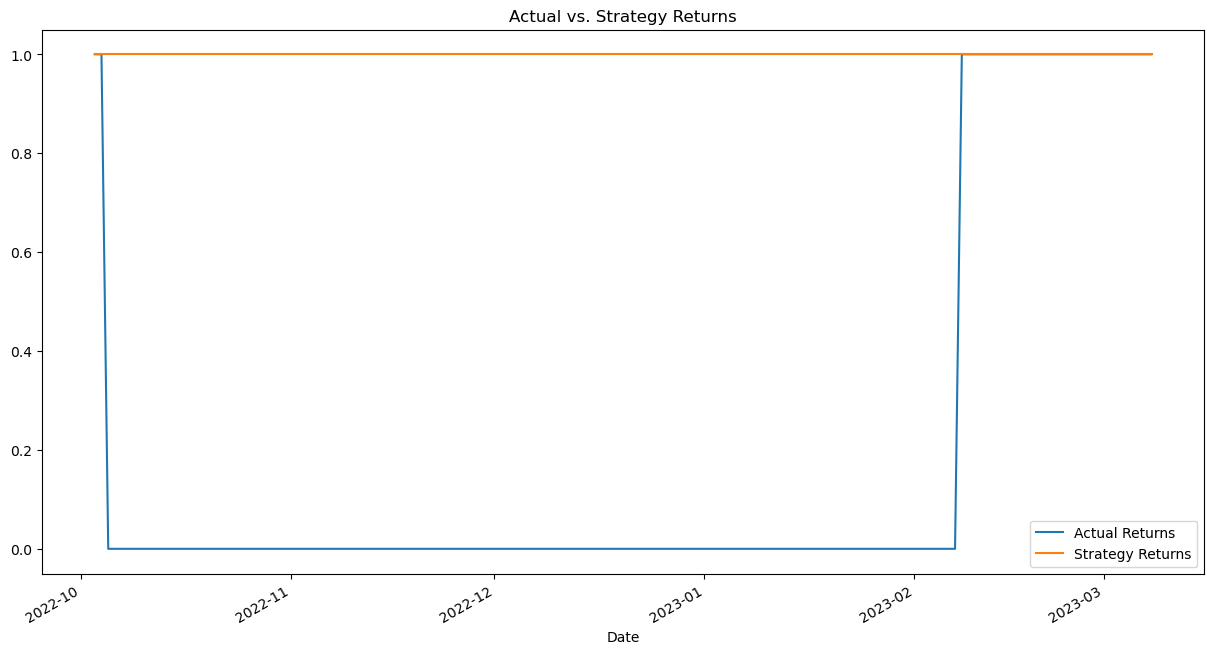

<Figure size 640x480 with 0 Axes>

In [35]:
# Plot the actual returns versus the strategy returns
import matplotlib.pyplot as plt

# Plot the actual returns versus the strategy returns
((1 + predictions_df[['Actual Returns', 'Strategy Returns']]
  .cumsum())
 .plot(figsize=(15, 8)))
plt.title('Actual vs. Strategy Returns')
plt.show()

plt.savefig('Actual vs. Strategy Returns.png')